In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Caricare il dataset e denominarlo con una variabile chiamata “dataset”

Caricare il dataset e denominarlo con una variabile chiamata “dataset”

In [52]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA/data/wildlife0901.csv', sep=';')

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC_CLASS        16099 non-null  object 
 1   AC_MASS         16122 non-null  int64  
 2   NUM_ENGS        16092 non-null  float64
 3   INCIDENT_MONTH  16122 non-null  int64  
 4   INCIDENT_YEAR   16122 non-null  int64  
 5   HEIGHT          16122 non-null  int64  
 6   SPEED           16122 non-null  int64  
 7   PHASE_OF_FLT    16122 non-null  int64  
 8   DAMAGE          16122 non-null  object 
 9   BIRDS_STRUCK    16122 non-null  int64  
 10  SIZE            16122 non-null  object 
 11  WARNED          16122 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


Indicare quanti sono gli incidenti che hanno coinvolto animali di dimensione “Small”, “Medium”, “Large” e “Unknown” 

In [54]:
dataset.groupby(by='SIZE').size()

SIZE
Large       1212
Medium      3474
Small      10639
Unknown      797
dtype: int64

Raggruppare gli incidenti per mesi e visualizzarli in un grafico. Qual è il mese con il maggior numero di incidenti?

<BarContainer object of 12 artists>

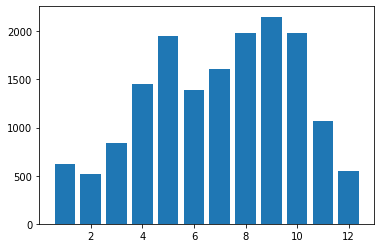

In [55]:
months = dataset.groupby(by='INCIDENT_MONTH').size()
plt.bar(months.index, months.values)

In [56]:
summary = pd.crosstab(dataset['INCIDENT_MONTH'], dataset['INCIDENT_YEAR'])
summary

INCIDENT_YEAR,2010,2011,2012,2013,2014
INCIDENT_MONTH,,,,,
1,141,131,142,128,80
2,79,90,143,95,112
3,177,163,199,147,156
4,245,293,350,297,267
5,309,340,443,426,432
6,248,271,319,269,279
7,404,360,446,401,0
8,514,449,484,537,0
9,505,560,562,525,0


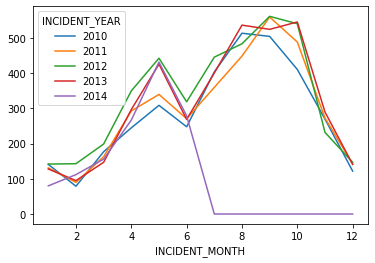

In [57]:
_ = summary.plot()

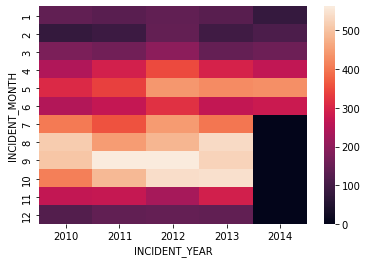

In [58]:
_ = sns.heatmap(summary)

# Trasformazione e Predizione

Trasformare i valori dei campi DAMAGE, SIZE, WARNED 

In [59]:
damage = {
    'U' : 0,
    'N' : 1,
    'M' : 3,
    'M?': 5,
    'S' : 7,
    'D' : 9,
}

size = {
    'Small':  1,
    'Medium': 3,
    'Large':  5,
    'Unknown':0,
}

warned = {
    'N':	      0,
    'Y':	      1,
    'Unknown':  3,
    'n':        0,
    'y':        1,
}

replace = {
    'DAMAGE': damage,
    'SIZE':   size,
    'WARNED': warned,
}

In [60]:
dataset.replace(replace, inplace=True)

In [61]:
dataset.head()

,AC_CLASS,AC_MASS,NUM_ENGS,INCIDENT_MONTH,INCIDENT_YEAR,HEIGHT,SPEED,PHASE_OF_FLT,DAMAGE,BIRDS_STRUCK,SIZE,WARNED
0,A,1,1.0,9,2011,0,0,1,1,1,1,0
1,A,1,1.0,5,2013,0,0,1,7,1,5,0
2,A,1,1.0,9,2013,0,0,1,1,1,1,1
3,A,1,1.0,12,2013,0,0,1,1,1,1,0
4,B,1,1.0,7,2010,0,0,1,1,1,3,1


Creare un nuovo dataset che consideri solo gli aeroplani e gli incidenti che coinvolgono animali con una dimensione nota. Denominare il dataset  “data_air”. In data_air eliminare poi l’attributo AC_CLASS divenuto irrilevante. 

In [62]:
data_air = dataset[(dataset['AC_CLASS'] == 'A') & (dataset['SIZE'] != 0)]
data_air.drop(columns='AC_CLASS', inplace=True)
data_air.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AC_MASS,NUM_ENGS,INCIDENT_MONTH,INCIDENT_YEAR,HEIGHT,SPEED,PHASE_OF_FLT,DAMAGE,BIRDS_STRUCK,SIZE,WARNED
0,1,1.0,9,2011,0,0,1,1,1,1,0
1,1,1.0,5,2013,0,0,1,7,1,5,0
2,1,1.0,9,2013,0,0,1,1,1,1,1
3,1,1.0,12,2013,0,0,1,1,1,1,0
8,2,2.0,9,2012,0,0,1,1,1,3,3


Eliminare le righe che contengono almeno un element NaN

In [63]:
data_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14842 entries, 0 to 16121
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC_MASS         14842 non-null  int64  
 1   NUM_ENGS        14835 non-null  float64
 2   INCIDENT_MONTH  14842 non-null  int64  
 3   INCIDENT_YEAR   14842 non-null  int64  
 4   HEIGHT          14842 non-null  int64  
 5   SPEED           14842 non-null  int64  
 6   PHASE_OF_FLT    14842 non-null  int64  
 7   DAMAGE          14842 non-null  int64  
 8   BIRDS_STRUCK    14842 non-null  int64  
 9   SIZE            14842 non-null  int64  
 10  WARNED          14842 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.4 MB


In [64]:
data_air.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
data_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14835 entries, 0 to 16121
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC_MASS         14835 non-null  int64  
 1   NUM_ENGS        14835 non-null  float64
 2   INCIDENT_MONTH  14835 non-null  int64  
 3   INCIDENT_YEAR   14835 non-null  int64  
 4   HEIGHT          14835 non-null  int64  
 5   SPEED           14835 non-null  int64  
 6   PHASE_OF_FLT    14835 non-null  int64  
 7   DAMAGE          14835 non-null  int64  
 8   BIRDS_STRUCK    14835 non-null  int64  
 9   SIZE            14835 non-null  int64  
 10  WARNED          14835 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.4 MB


Si vuole predire la dimensione dell’animale sulla base degli altri attributi presenti nel dataset.
Dividere “data_air” in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”.

Valutare l’accuracy ottenuta con il modello BernoulliNB

In [66]:
train, test = train_test_split(data_air, train_size=2/3, random_state=1)

In [67]:
X_tr = train.drop(columns='SIZE')
y_tr = train['SIZE']
X_ts = test.drop(columns='SIZE')
y_ts = test['SIZE']

In [68]:
clf = BernoulliNB()
y_pr = clf.fit(X_tr, y_tr).predict(X_ts)

Il valore di accuratezza ottenuto è abbastanza elevato, tuttavia, cosa si scopre analizzando la confusion matrix?

In [69]:
metrics.accuracy_score(y_ts, y_pr)

0.6914054600606674

In [70]:
metrics.confusion_matrix(y_ts, y_pr)

array([[3415,    0,    1],
       [1131,    1,    0],
       [ 394,    0,    3]])

Se si utilizza un modello basato su Decision Tree che valore di accuratezza si ottiene? Cambia qualcosa nella confusion matrix?

In [71]:
clf = DecisionTreeClassifier()
y_pr = clf.fit(X_tr, y_tr).predict(X_ts)

In [72]:
metrics.accuracy_score(y_ts, y_pr)

0.5943377148634985

In [73]:
metrics.confusion_matrix(y_ts, y_pr)

array([[2503,  736,  177],
       [ 675,  337,  120],
       [ 170,  128,   99]])

In [74]:
metrics.recall_score(y_ts, y_pr, average=None)

array([0.73272834, 0.29770318, 0.24937028])

In [75]:
train_stf, test_stf = train_test_split(data_air, train_size=2/3, random_state=1,
                                       stratify=data_air['SIZE'])

In [76]:
X_tr = train_stf.drop(columns='SIZE')
y_tr = train_stf['SIZE']
X_ts = test_stf.drop(columns='SIZE')
y_ts = test_stf['SIZE']

In [77]:
y_pr = clf.fit(X_tr, y_tr).predict(X_ts)

In [78]:
metrics.accuracy_score(y_ts, y_pr)

0.6086956521739131

In [80]:
metrics.confusion_matrix(y_ts, y_pr)

array([[2558,  721,  171],
       [ 661,  338,  109],
       [ 140,  133,  114]])

In [79]:
metrics.recall_score(y_ts, y_pr, average=None)

array([0.74144928, 0.30505415, 0.29457364])

Si consideri un nuovo dataset ottenuto con un bilanciamento diverso delle istanze composto cioè di ¾ delle istanze aventi valore di SIZE = 1 (Small), ¾ delle istanze aventi valore di SIZE = 3 (Medium), ¾ delle istanze aventi valore di SIZE = 5 (Large) e aventi come test set il rimanente delle istanze. Come cambia l’accuratezza considerando sempre un modello basato su Decision Tree? Cambia qualcosa nella confusion matrix?

In [81]:
train_stf, test_stf = train_test_split(data_air, train_size=.75, random_state=1,
                                       stratify=data_air['SIZE'])

In [82]:
X_tr = train_stf.drop(columns='SIZE')
y_tr = train_stf['SIZE']
X_ts = test_stf.drop(columns='SIZE')
y_ts = test_stf['SIZE']

In [83]:
y_pr = clf.fit(X_tr, y_tr).predict(X_ts)

In [84]:
metrics.accuracy_score(y_ts, y_pr)

0.6082502022108385

In [85]:
metrics.confusion_matrix(y_ts, y_pr)

array([[1921,  540,  127],
       [ 485,  251,   95],
       [ 121,   85,   84]])

In [86]:
metrics.recall_score(y_ts, y_pr, average=None)

array([0.74227202, 0.30204573, 0.28965517])

Che valore di accuratezza si ottiene con un 10 Fold cross validation e un modello basato su Decision Tree? 

In [87]:
X = data_air.drop(columns='SIZE')
y = data_air['SIZE']
xscores = cross_val_score(clf, X, y, scoring='accuracy', cv=10, n_jobs=-1)
xscores.mean()

0.38199063783072484